<a href="https://colab.research.google.com/github/Sunkeerth/ML_and_DL_practing/blob/main/ML_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning is all about systems that learn patterns from data on their own. Instead of us explicitly programming every rule, we give the model data, and it figures out the underlying logic or patterns by itself—like teaching it to learn from experience!

Classification :

 **Classification** is like sorting things into categories.
 1. **Binary classification** is when you have just two categories—like yes or no, spam or not spam. It’s a simple either-or situation.
 2. **Multi-class classification** is when you have three or more categories. For example, classifying an animal photo as cat, dog, or bird. So, binary is just two options, and multi-class is several options

Regression :
**Regression** is all about predicting a continuous value that can move in any direction—up or down—depending on the data. It’s just about finding the best relationship between what you know and what number you want to predict


Task ⁉

1. Linear Regression ⁉

linear regression is about finding a straight line that best fits your data. Imagine you have a bunch of points on a graph—each point shows how one thing (like studying time) relates to another thing (like exam score).

  #  Gradient descent
  **Gradient descent** is an optimization method. Imagine you're standing on a hill, trying to get to the lowest point. Each step you take is in the direction of the steepest downward slope. In math or machine learning, it’s how we adjust parameters to minimize errors or loss. You keep stepping down until you reach the bottom—or close enough!

    Gradient Descent + Cost Function (Formulas + Explanation)
✅ 1) What is Gradient Descent?

Gradient Descent is an optimization algorithm used to minimize the cost function by updating model parameters step-by-step.

Gradient Descent is an optimization algorithm used to minimize the loss (cost) function by updating parameters step-by-step.

✅ Where MSE comes in?

MSE (Mean Squared Error) is a loss function (cost function) used in Linear Regression to measure how wrong the predictions are.

So:

MSE tells “how much error is there”

Gradient Descent tells “how to reduce that error”

✅ Correct Statement

Gradient Descent minimizes the MSE loss function, and by doing repeated updates, it finds the minimum possible loss (best parameters).







Epoch    0 | Loss = 44.000000 | m = 0.4400 | b = 0.1200

Final Model:
m (slope)     = 1.7374
b (intercept) = 0.4628


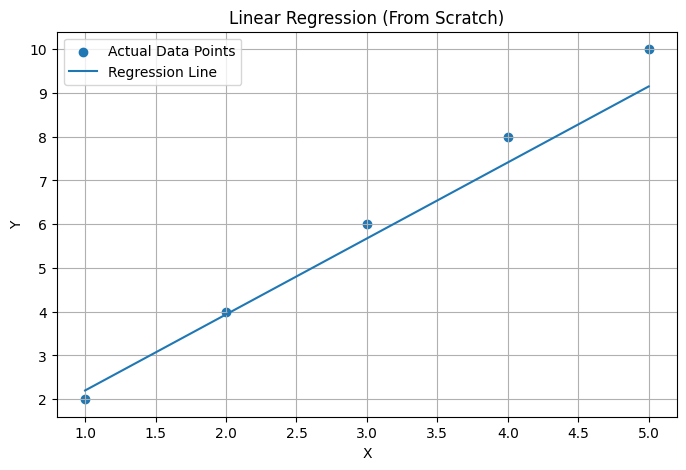

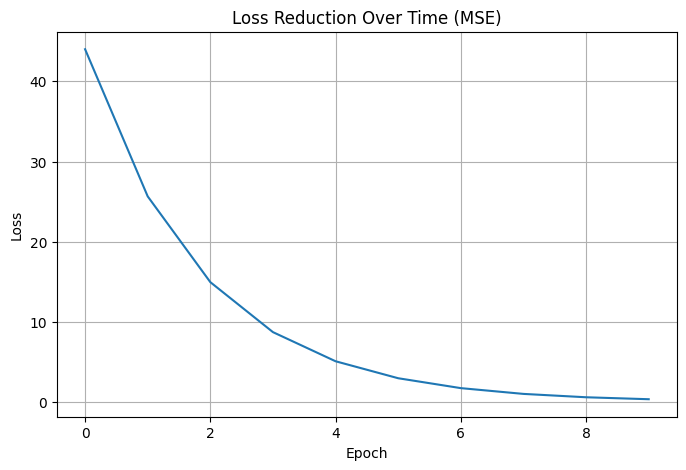

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# LINEAR REGRESSION (FROM SCRATCH) - HANDS ON
# ==========================================================
# We want to fit a straight line:
#     y = m*x + b
#
# Where:
#   m = slope
#   b = intercept
#
# Prediction formula:
#   y_hat = m*x + b
#
# Loss function (Mean Squared Error):
#   MSE = (1/n) * Σ (y - y_hat)^2
#
# Goal:
#   Find best m and b that minimize MSE
#
# We will use Gradient Descent:
#   m = m - lr * dMSE/dm
#   b = b - lr * dMSE/db
# ==========================================================


# ==========================================================
# 1) SIMPLE DATA
# ==========================================================
# We'll take 2 points to form a basic line idea:
#   (x1, y1), (x2, y2)
# Example: (1,2), (2,4)
# That line is roughly y = 2x

# But we will add more points to calculate loss and train properly.
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2, 4, 6, 8, 10], dtype=float)  # Perfect line: y = 2x

# You can also try noisy data like this:
# y = np.array([2.1, 3.9, 6.2, 7.8, 10.1], dtype=float)


# ==========================================================
# 2) INITIALIZE m AND b (start from random or 0)
# ==========================================================
m = 0.0
b = 0.0

# Learning rate (how fast we update)
lr = 0.01

# Number of iterations (training steps)
epochs = 10


# ==========================================================
# 3) FUNCTIONS: PREDICT + LOSS
# ==========================================================
def predict(x, m, b):
    """
    Prediction formula:
        y_hat = m*x + b
    """
    return m * x + b


def mse_loss(y, y_hat):
    """
    Mean Squared Error (MSE):
        MSE = (1/n) * Σ (y - y_hat)^2
    """
    return np.mean((y - y_hat) ** 2)


# ==========================================================
# 4) TRAIN USING GRADIENT DESCENT
# ==========================================================
# Derivatives of MSE:
#
# y_hat = m*x + b
#
# MSE = (1/n) Σ (y - y_hat)^2
#
# d(MSE)/dm = (-2/n) Σ x * (y - y_hat)
# d(MSE)/db = (-2/n) Σ (y - y_hat)
#
# Update rules:
# m = m - lr * d(MSE)/dm
# b = b - lr * d(MSE)/db
# ==========================================================

loss_history = []

for epoch in range(epochs):
    # Step 1: Predict
    y_hat = predict(x, m, b)

    # Step 2: Calculate Loss
    loss = mse_loss(y, y_hat)
    loss_history.append(loss)

    # Step 3: Compute gradients
    n = len(x)

    dm = (-2 / n) * np.sum(x * (y - y_hat))   # dMSE/dm
    db = (-2 / n) * np.sum(y - y_hat)         # dMSE/db

    # Step 4: Update parameters
    m = m - lr * dm
    b = b - lr * db

    # Print some steps (optional)
    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Loss = {loss:.6f} | m = {m:.4f} | b = {b:.4f}")


print("\nFinal Model:")
print(f"m (slope)     = {m:.4f}")
print(f"b (intercept) = {b:.4f}")


# ==========================================================
# 5) VISUALIZATION
# ==========================================================

# Plot data points
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Actual Data Points")

# Plot final regression line
y_final = predict(x, m, b)
plt.plot(x, y_final, label="Regression Line")

plt.title("Linear Regression (From Scratch)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


# ==========================================================
# 6) LOSS CURVE VISUALIZATION
# ==========================================================
plt.figure(figsize=(8, 5))
plt.plot(loss_history)
plt.title("Loss Reduction Over Time (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# STEP 1) LINEAR REGRESSION FORMULAS (THEORY)
# ==========================================================
#
# ✅ Hypothesis / Prediction Function
# ----------------------------------------------------------
# In linear regression:
#
#     hθ(x) = θ0 + θ1 * x
#
# Where:
#   θ0 = bias / intercept
#   θ1 = weight / slope
#   x  = input feature
#   hθ(x) = predicted output
#
#
# ✅ Cost Function (Mean Squared Error)
# ----------------------------------------------------------
# For m training examples:
#
#                 1     m
#     J(θ0, θ1) = ---  Σ  ( hθ(x(i)) - y(i) )^2
#                2m    i=1
#
# Meaning:
#   m = number of training examples
#   x(i) = input of i-th example
#   y(i) = actual output of i-th example
#   error = hθ(x(i)) - y(i)
#
#
# ✅ Gradient Descent Update Rules
# ----------------------------------------------------------
# To minimize J(θ0, θ1), update θ0 and θ1:
#
# θ0 update:
#
#                 1     m
#     θ0 := θ0 - α * --- Σ ( hθ(x(i)) - y(i) )
#                 m    i=1
#
# θ1 update:
#
#                 1     m
#     θ1 := θ1 - α * --- Σ ( hθ(x(i)) - y(i) ) * x(i)
#                 m    i=1
#
#
# ✅ Loss vs Cost
# ----------------------------------------------------------
# Loss for one example:
#
#     L(i)(θ) = ( hθ(x(i)) - y(i) )^2
#
# Cost for full dataset:
#
#               1     m
#     J(θ)  =  ---  Σ  L(i)(θ)
#              2m    i=1
#
# Final Difference:
#   Loss = error for one example
#   Cost = average loss for full dataset
# ==========================================================


# ==========================================================
# STEP 2) INPUT DATASET (x, y)
# ==========================================================
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2, 4, 6, 8, 10], dtype=float)  # Perfect line: y = 2x

# Number of training examples
m = len(x)


# ==========================================================
# STEP 3) INITIALIZE PARAMETERS (θ0, θ1)
# ==========================================================
theta0 = 0.0   # θ0 = intercept / bias
theta1 = 0.0   # θ1 = slope / weight


# ==========================================================
# STEP 4) SET HYPERPARAMETERS (Learning Rate + Iterations)
# ==========================================================
alpha = 0.01
iterations = 1000


# ==========================================================
# STEP 5) DEFINE FUNCTIONS (Hypothesis + Cost)
# ==========================================================
def hypothesis(x, theta0, theta1):
    """
    hθ(x) = θ0 + θ1*x
    """
    return theta0 + theta1 * x


def compute_cost(x, y, theta0, theta1):
    """
    J(θ0, θ1) = (1/(2m)) * Σ (hθ(x(i)) - y(i))^2
    """
    m = len(x)
    y_pred = hypothesis(x, theta0, theta1)
    cost = (1/(2*m)) * np.sum((y_pred - y) ** 2)
    return cost


# ==========================================================
# STEP 6) TRAIN USING GRADIENT DESCENT
# ==========================================================
cost_history = []

for i in range(iterations):

    # 1) Predict using current parameters
    y_pred = hypothesis(x, theta0, theta1)

    # 2) Compute error
    error = y_pred - y

    # 3) Compute gradients
    # dθ0 = (1/m) * Σ (hθ(x(i)) - y(i))
    d_theta0 = (1/m) * np.sum(error)

    # dθ1 = (1/m) * Σ (hθ(x(i)) - y(i)) * x(i)
    d_theta1 = (1/m) * np.sum(error * x)

    # 4) Update parameters
    theta0 = theta0 - alpha * d_theta0
    theta1 = theta1 - alpha * d_theta1

    # 5) Store cost for graph
    cost = compute_cost(x, y, theta0, theta1)
    cost_history.append(cost)

    # Print cost every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i:4d} | Cost J(θ) = {cost:.6f}")


# ==========================================================
# STEP 7) PRINT FINAL PARAMETERS
# ==========================================================
print("\nFinal Parameters Learned:")
print(f"θ0 (bias/intercept) = {theta0:.4f}")
print(f"θ1 (weight/slope)   = {theta1:.4f}")


# ==========================================================
# STEP 8) GRAPH 1: COST DECREASING CURVE
# ==========================================================
plt.figure(figsize=(8, 5))
plt.plot(cost_history)
plt.title("Cost Function Decreasing (Gradient Descent)")
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.grid(True)
plt.show()


# ==========================================================
# STEP 9) GRAPH 2: BEST FIT LINE VS ACTUAL DATA
# ==========================================================
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Actual Data Points")

y_final = hypothesis(x, theta0, theta1)
plt.plot(x, y_final, label="Best Fit Line")

plt.title("Linear Regression Fit using Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


One-Hot Encoding (Simple + Detailed)
🔥 What is One-Hot Encoding?

One-Hot Encoding is a method to convert categorical/text data (like "Red", "Blue", "Green") into binary numeric vectors (0 and 1).

Why we need it?

Because ML models cannot directly understand text labels like:

"Apple"

"Mango"

"Banana"


In [1]:
# ============================================
# ONE-HOT ENCODING (FULL CODE + DETAILED STEPS)
# ============================================

# STEP 1: Import required libraries
# pandas -> used to create and handle datasets (tables)
# numpy  -> used for numerical operations (optional but useful)
import pandas as pd
import numpy as np

# STEP 2: Create a sample dataset (like a real dataset)
# Here we have:
# - Name (text, not useful for model, but okay)
# - City (categorical text -> needs One-Hot Encoding)
# - Gender (categorical text -> needs One-Hot Encoding)
# - Purchased (output label -> yes/no -> we can convert to 0/1)
data = {
    "Name": ["A", "B", "C", "D", "E"],
    "City": ["Hyderabad", "Chennai", "Hyderabad", "Bangalore", "Chennai"],
    "Gender": ["Male", "Female", "Female", "Male", "Male"],
    "Purchased": ["Yes", "No", "Yes", "No", "Yes"]
}

# Convert dictionary to DataFrame (table)
df = pd.DataFrame(data)
#  how it looks
# Name       City  Gender Purchased
# 0    A  Hyderabad    Male       Yes
# 1    B    Chennai  Female        No
# 2    C  Hyderabad  Female       Yes
# 3    D  Bangalore    Male        No
# 4    E    Chennai    Male       Yes


# Print original dataset
print("✅ Original Dataset:")
print(df)


# ==================================================
# STEP 3: Identify categorical columns (text columns)
# ==================================================
# One-Hot Encoding is mainly used for categorical text columns.
# Here City and Gender are categorical features.
# Purchased is label/output, so we will convert it separately.
categorical_columns = ["City", "Gender"]

print("\n✅ Categorical Columns:", categorical_columns)


# ==========================================
# STEP 4: Apply One-Hot Encoding using Pandas
# ==========================================
# pd.get_dummies() converts categorical columns into numeric binary columns.
# Example:
# City = Hyderabad -> City_Hyderabad = 1, others = 0
# Gender = Male -> Gender_Male = 1, Gender_Female = 0
df_encoded = pd.get_dummies(df, columns=categorical_columns)

print("\n✅ Dataset After One-Hot Encoding (Pandas get_dummies):")
print(df_encoded)


# ===================================================
# STEP 5: Convert the output label (Purchased) to 0/1
# ===================================================
# ML models need output also as numbers.
# Here:
# Yes -> 1
# No  -> 0
df_encoded["Purchased"] = df_encoded["Purchased"].map({"Yes": 1, "No": 0})

print("\n✅ Final Dataset (After Converting Purchased to 0/1):")
print(df_encoded)


# ======================================
# STEP 6: Separate Features (X) and Label (y)
# ======================================
# Features = input columns used for training model
# Label = output column (Purchased)
X = df_encoded.drop(columns=["Purchased"])  # input features
y = df_encoded["Purchased"]                 # output label

print("\n✅ Features (X):")
print(X)

print("\n✅ Label (y):")
print(y)


# ======================================
# EXTRA: Why One-Hot Encoding is useful?
# ======================================
# Because ML models cannot understand text like:
# "Hyderabad", "Chennai", "Male", "Female"
# So One-Hot Encoding converts them into numeric binary columns.
# Now the dataset becomes fully numeric -> model can train.


✅ Original Dataset:
  Name       City  Gender Purchased
0    A  Hyderabad    Male       Yes
1    B    Chennai  Female        No
2    C  Hyderabad  Female       Yes
3    D  Bangalore    Male        No
4    E    Chennai    Male       Yes

✅ Categorical Columns: ['City', 'Gender']

✅ Dataset After One-Hot Encoding (Pandas get_dummies):
  Name Purchased  City_Bangalore  City_Chennai  City_Hyderabad  Gender_Female  \
0    A       Yes           False         False            True          False   
1    B        No           False          True           False           True   
2    C       Yes           False         False            True           True   
3    D        No            True         False           False          False   
4    E       Yes           False          True           False          False   

   Gender_Male  
0         True  
1        False  
2        False  
3         True  
4         True  

✅ Final Dataset (After Converting Purchased to 0/1):
  Name  Purchased  Cit



# ✅ NumPy in ML (Simple Explanation + Examples)

## 🔥 Why NumPy is very important in ML?

Because Machine Learning is basically **math on data**.

Most ML operations are like:

* adding numbers
* multiplying matrices
* calculating mean and variance
* computing gradients (in deep learning)

So NumPy helps us do all this **fast and easily**.

---

# 1) ✅ Vector (1D Array)

### 📌 What is a Vector?

A **vector** is a list of numbers in **one line** (1D).

Example:
[
x = [2,\ 4,\ 6]
]

### NumPy Example:

```python
import numpy as np

x = np.array([2, 4, 6])
print("Vector:", x)
print("Shape:", x.shape)
```

### Output:

```
Vector: [2 4 6]
Shape: (3,)
```

✅ **Meaning:** This vector has **3 values**.

### Where vector is used in ML?

* A single row of input data (one sample)
* weights of a model
* feature list

Example:
If one student has features:

* age = 20
* marks = 85
* attendance = 90

That is a vector:
[
[20,\ 85,\ 90]
]

---

# 2) ✅ Matrix (2D Array)

### 📌 What is a Matrix?

A **matrix** is a table of numbers (rows and columns) → **2D**

Example:
[
X =
\begin{bmatrix}
1 & 2 & 3 \
4 & 5 & 6
\end{bmatrix}
]

### NumPy Example:

```python
import numpy as np

X = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

print("Matrix:\n", X)
print("Shape:", X.shape)
```

### Output:

```
Matrix:
 [[1 2 3]
  [4 5 6]]
Shape: (2, 3)
```

✅ Meaning:

* 2 rows
* 3 columns

### Where matrix is used in ML?

A full dataset is usually stored as a matrix:

Example:

| age | marks | attendance |
| --- | ----- | ---------- |
| 20  | 85    | 90         |
| 21  | 70    | 80         |

That is a matrix.

---

# 3) ✅ Dot Product (Most Important in ML)

### 📌 What is Dot Product?

Dot product is **multiplying two vectors** and adding them.

Formula:
[
a \cdot b = a_1b_1 + a_2b_2 + a_3b_3 + ...
]

Example:
[
[1,2,3] \cdot [4,5,6]
= 1×4 + 2×5 + 3×6
= 4 + 10 + 18
= 32
]

### NumPy Example:

```python
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

dot = np.dot(a, b)
print("Dot Product:", dot)
```

### Output:

```
Dot Product: 32
```

### Why dot product is important in ML?

Because ML prediction is often:

[
y = w \cdot x + b
]

Where:

* (w) = weights (vector)
* (x) = input features (vector)
* (b) = bias

Example:

```python
w = np.array([0.5, 1.5, -1])
x = np.array([10, 2, 3])
b = 4

y = np.dot(w, x) + b
print("Prediction y =", y)
```

This is how linear regression works internally.

---

# 4) ✅ Mean (Average)

### 📌 What is Mean?

Mean is average value.

Formula:
[
\mu = \frac{x_1 + x_2 + ... + x_n}{n}
]

Example:
[
[10, 20, 30] \Rightarrow mean = 20
]

### NumPy Example:

```python
import numpy as np

arr = np.array([10, 20, 30])
print("Mean:", np.mean(arr))
```

Output:

```
Mean: 20.0
```

### Why mean is used in ML?

* to fill missing values
* to normalize data
* to calculate standard deviation

---

# 5) ✅ Variance (How spread out the data is)

### 📌 What is Variance?

Variance tells how much values differ from mean.

Formula:
[
\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2
]

Example:
If values are far from mean → variance is high.

### NumPy Example:

```python
import numpy as np

arr = np.array([10, 20, 30])
print("Variance:", np.var(arr))
```

Output:

```
Variance: 66.6666666667
```

### Meaning:

Data is spread.

---

# 6) ✅ Standard Deviation (Most used in ML)

### 📌 What is Standard Deviation?

Standard deviation is just square root of variance.

Formula:
[
\sigma = \sqrt{\sigma^2}
]

### NumPy Example:

```python
import numpy as np

arr = np.array([10, 20, 30])
print("Standard Deviation:", np.std(arr))
```

Output:

```
Standard Deviation: 8.1649658093
```

### Why standard deviation is used in ML?

In **standard scaling**:

[
z = \frac{x - \mu}{\sigma}
]

This makes all features in same scale.

---

# ⭐ Most Important Extra NumPy Things for ML

## ✅ 1) Reshape (Very important)

ML models expect input in a proper shape.

Example:

```python
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6])

# reshape into 2 rows and 3 columns
X = x.reshape(2, 3)

print(X)
print("Shape:", X.shape)
```

Output:

```
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)
```

---

## ✅ 2) Matrix Multiplication (Used in Neural Networks)

Matrix multiplication is used heavily in ML.

Example:

```python
import numpy as np

A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

C = np.dot(A, B)   # or A @ B
print("Matrix Multiplication:\n", C)
```

---

## ✅ 3) Axis concept (Row-wise and Column-wise)

This is super important.

Example:

```python
import numpy as np

X = np.array([[10, 20, 30],
              [40, 50, 60]])

print("Mean of all:", np.mean(X))
print("Mean of each column:", np.mean(X, axis=0))
print("Mean of each row:", np.mean(X, axis=1))
```

### Meaning:

* `axis=0` → column wise
* `axis=1` → row wise

---

# ✅ Final Summary (Very Simple)

| Concept     | Meaning        | NumPy Function            |
| ----------- | -------------- | ------------------------- |
| Vector      | 1D data        | `np.array([...])`         |
| Matrix      | 2D table       | `np.array([[...],[...]])` |
| Dot Product | multiply + add | `np.dot(a,b)`             |
| Mean        | average        | `np.mean()`               |
| Variance    | spread         | `np.var()`                |
| Std Dev     | spread measure | `np.std()`                |
| Reshape     | change shape   | `reshape()`               |

---




In [2]:
import numpy as np
a=[1,3,5]
b=[2,4,6]
res=np.dot(a,b)
print(res)

44




---

# ✅ Logistic Regression (Full Explanation)

## ✅ 1) What is Logistic Regression?

**Logistic Regression** is a **supervised machine learning algorithm** used for **classification problems**, mainly:

* **Binary classification** → (0 or 1)
  Examples:
* Spam (Yes/No)
* Disease (Positive/Negative)
* Pass/Fail

Even though the name contains “regression”, it is used for **classification**.

---

## ✅ 2) Why Logistic Regression is Used?

We use Logistic Regression because it gives:

### ✅ Output as Probability (0 to 1)

It predicts:

[
P(y=1|x)
]

Then converts probability into a class:

* if probability ≥ 0.5 → class = 1
* else → class = 0

---

## ✅ 3) What drawback does it overcome? (Previous drawback)

### ❌ Problem with Linear Regression for Classification

If we use **Linear Regression** for classification:

[
y = \theta_0 + \theta_1 x
]

It can give output like:

* -2
* 1.5
* 10

But in classification, we need only:

[
0 \leq \hat{y} \leq 1
]

So **Linear Regression fails** because it produces values outside 0 and 1.

---

## ✅ Logistic Regression Overcomes This

Logistic Regression uses **Sigmoid Function** to convert any value into a probability between **0 and 1**.

---

# ✅ 4) Logistic Regression Formula

## ✅ (A) Linear Part (same as linear regression)

[
z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
]

## ✅ (B) Sigmoid Function

[
\sigma(z) = \frac{1}{1+e^{-z}}
]

## ✅ Final Prediction

[
\hat{y} = \sigma(z)
]

So logistic regression predicts:

[
\hat{y} = P(y=1|x)
]

---

# ✅ 5) Decision Boundary

We classify based on threshold (mostly 0.5):

[
\hat{y} \ge 0.5 \Rightarrow y=1
]
[
\hat{y} < 0.5 \Rightarrow y=0
]

---

# ✅ 6) Cost Function (Loss Function)

Logistic Regression uses **Log Loss (Binary Cross Entropy)** because MSE is not good for sigmoid.

[
J(\theta)= -\frac{1}{m}\sum_{i=1}^{m} \left[y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})\right]
]

---

# ✅ 7) Gradient Descent Update Rule

[
\theta_j = \theta_j - \alpha \frac{\partial J}{\partial \theta_j}
]

Where:

* α = learning rate
* θ = parameters/weights

---

---

# ✅ 8) Python Code (With Comments + Visualization)



# ✅ 9) What Logistic Regression Gives You (Output)

### Logistic Regression predicts probability:

Example:

[
P(y=1|x)=0.87
]

Means:

* **87% chance class is 1**
* so output becomes **1**

---

# ✅ 10) Advantages of Logistic Regression

✅ Works best for binary classification
✅ Gives probability output
✅ Fast and efficient
✅ Works well for linearly separable data
✅ Simple and interpretable

---

# ✅ 11) Limitations

❌ Not good for complex nonlinear boundaries
❌ Needs feature scaling sometimes
❌ Can underperform compared to deep learning for big complex datasets




Accuracy: 0.8666666666666667

Confusion Matrix:
 [[27  7]
 [ 1 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.78      0.96      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.88      0.87      0.87        60



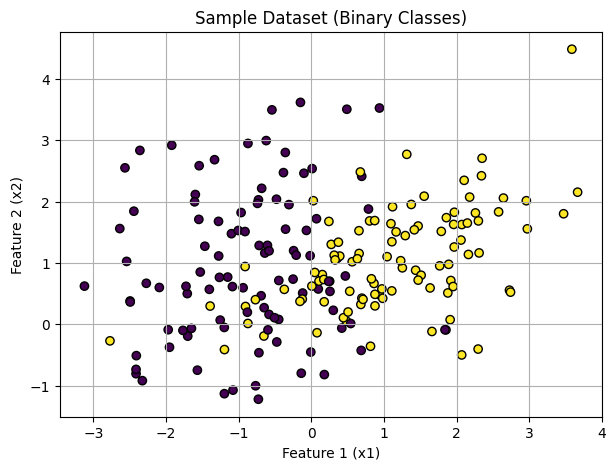

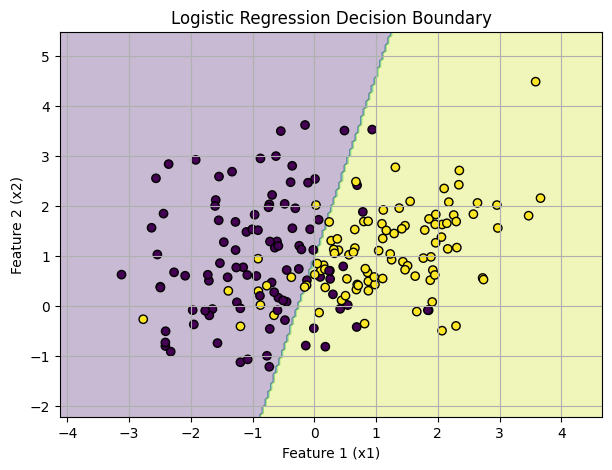

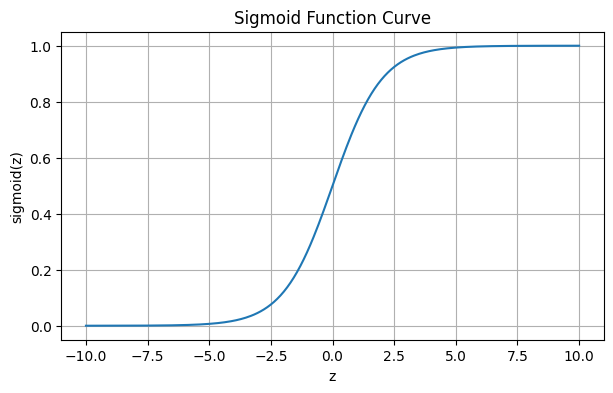


Example probabilities for first 5 test samples:
X_test[0] = [-0.62154585  2.99462288]  ->  Probabilities = [0.89385376 0.10614624]  -> Predicted Class = 0
X_test[1] = [0.46785542 0.7871928 ]  ->  Probabilities = [0.28478841 0.71521159]  -> Predicted Class = 1
X_test[2] = [0.30162791 0.22791173]  ->  Probabilities = [0.2895408 0.7104592]  -> Predicted Class = 1
X_test[3] = [0.17677464 0.36618904]  ->  Probabilities = [0.35331085 0.64668915]  -> Predicted Class = 1
X_test[4] = [1.0951577  1.64017517]  ->  Probabilities = [0.16392218 0.83607782]  -> Predicted Class = 1


In [3]:
# ============================================================
# LOGISTIC REGRESSION (Binary Classification) - Full Code
# With Formulas + Explanation in Comments + Visualization
# ============================================================


# ----------------------------
# IMPORTS (Explained)
# ----------------------------

import numpy as np
# numpy = used for numerical operations like arrays, math functions, exp(), etc.

import matplotlib.pyplot as plt
# matplotlib.pyplot = used for plotting graphs (scatter plot, sigmoid curve, decision boundary)

from sklearn.datasets import make_classification
# make_classification = creates a sample classification dataset automatically

from sklearn.model_selection import train_test_split
# train_test_split = splits dataset into training and testing parts

from sklearn.linear_model import LogisticRegression
# LogisticRegression = ready-made logistic regression model from scikit-learn

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# accuracy_score = gives accuracy of model
# confusion_matrix = shows correct/incorrect predictions in matrix form
# classification_report = gives precision, recall, f1-score


# ============================================================
# 1) CREATE SAMPLE DATASET
# ============================================================

# We create 2-feature data so we can visualize it in 2D graph
X, y = make_classification(
    n_samples=200,       # total 200 data points
    n_features=2,        # 2 features -> (x1, x2)
    n_redundant=0,       # no extra repeated features
    n_clusters_per_class=1,
    random_state=42      # fixed random seed for same output every time
)

# X = features (inputs)
# y = labels (outputs: 0 or 1)


# ============================================================
# 2) SPLIT DATA INTO TRAIN AND TEST
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # 30% test data, 70% training data
    random_state=42
)

# Training data -> model learns from it
# Testing data -> model is evaluated on it


# ============================================================
# 3) CREATE + TRAIN LOGISTIC REGRESSION MODEL
# ============================================================

model = LogisticRegression()
# This creates the logistic regression classifier

model.fit(X_train, y_train)
# fit() trains the model by finding best weights (theta)

# ----------------------------
# LOGISTIC REGRESSION FORMULAS
# ----------------------------

# (1) Linear equation (same like linear regression):
# z = θ0 + θ1*x1 + θ2*x2 + ... + θn*xn

# (2) Sigmoid function (converts z into probability 0 to 1):
# sigmoid(z) = 1 / (1 + e^(-z))

# (3) Final prediction probability:
# y_hat = sigmoid(z)

# (4) Convert probability into class:
# if y_hat >= 0.5 -> class = 1
# else -> class = 0

# (5) Loss Function (Binary Cross Entropy / Log Loss):
# J(θ) = -(1/m) * Σ [ y*log(y_hat) + (1-y)*log(1-y_hat) ]


# ============================================================
# 4) PREDICTION
# ============================================================

y_pred = model.predict(X_test)
# predict() gives final class output (0 or 1)

y_prob = model.predict_proba(X_test)
# predict_proba() gives probability for both classes
# Example output: [P(class0), P(class1)]


# ============================================================
# 5) MODEL EVALUATION
# ============================================================

print("Accuracy:", accuracy_score(y_test, y_pred))
# Accuracy = (Correct Predictions / Total Predictions)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Confusion matrix format:
# [[TN FP]
#  [FN TP]]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Includes:
# precision = TP / (TP + FP)
# recall    = TP / (TP + FN)
# f1-score  = harmonic mean of precision and recall


# ============================================================
# 6) VISUALIZATION 1: PLOT DATA POINTS
# ============================================================

plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.title("Sample Dataset (Binary Classes)")
plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.grid(True)
plt.show()


# ============================================================
# 7) VISUALIZATION 2: DECISION BOUNDARY
# ============================================================

# Decision boundary means:
# The line/area where model changes prediction from 0 to 1

# Create a mesh grid (many points) to plot boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# Predict class for each point in mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.grid(True)
plt.show()


# ============================================================
# 8) VISUALIZATION 3: SIGMOID FUNCTION GRAPH
# ============================================================

# Sigmoid formula:
# sigmoid(z) = 1 / (1 + e^(-z))

z = np.linspace(-10, 10, 300)          # z values from -10 to +10
sigmoid = 1 / (1 + np.exp(-z))         # apply sigmoid formula

plt.figure(figsize=(7, 4))
plt.plot(z, sigmoid)
plt.title("Sigmoid Function Curve")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()


# ============================================================
# 9) SHOW PROBABILITY OUTPUT EXAMPLE
# ============================================================

print("\nExample probabilities for first 5 test samples:")
for i in range(5):
    print(f"X_test[{i}] = {X_test[i]}  ->  Probabilities = {y_prob[i]}  -> Predicted Class = {y_pred[i]}")
